In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures



# Libraries for plotting:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [118]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(file_path, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [119]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [120]:
# Functions;

def Dist_Plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of Cars")

    plt.show()
    plt.close()


def PollyPlot(xtrain, xtest, ytrain, ytest, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    # training data
    # testing data
    # lr:  linear regression object
    # poly_transform:  polynomial transformation object

    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, ytrain, 'ro', label='Training Data')
    plt.plot(xtest, ytest, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(
        x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [121]:
y_data = df["price"]

# Drop price data in dataframe x_data:
x_data = df.drop("price", axis=1)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.45, random_state=0)

print("Number of Test sample:", x_test.shape[0])
print("Number of Training samples:", x_train.shape[0])

Number of Test sample: 91
Number of Training samples: 110


In [123]:
# Now, let's create a Linear Regression model "poly" and train it.

pr = PolynomialFeatures(degree=5)

In [124]:
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [125]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [126]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.71508499,  7308.03837696, 12213.79222245, 18893.17259916,
       19995.86710176])

In [127]:
# Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.71508499  7308.03837696 12213.79222245 18893.17259916]
True values: [ 6295. 10698. 13860. 13499.]


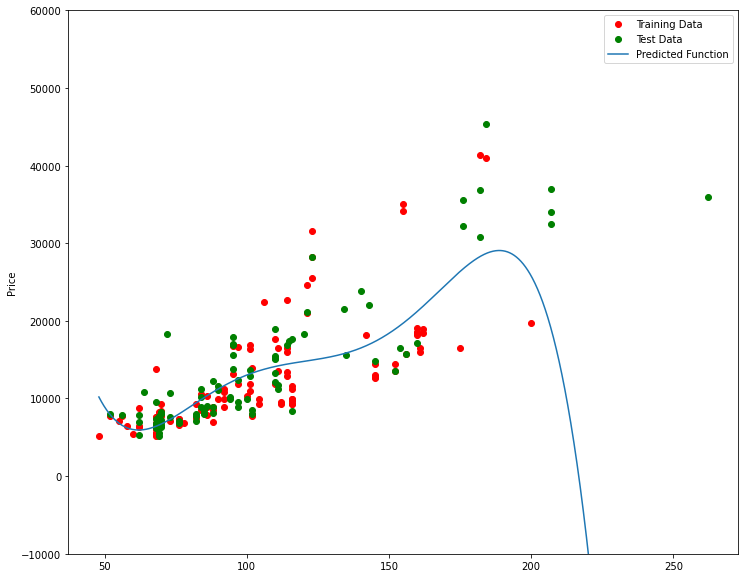

In [128]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [129]:
# R^2 of the training data:
poly.score(x_train_pr, y_train)

0.5567716902601785

In [130]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.871479278233295

Text(3, 0.75, 'Maximum R^2 ')

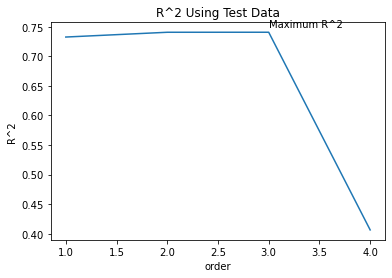

In [131]:
lre = LinearRegression()
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lre.fit(x_train_pr, y_train)

    Rsqu_test.append(lre.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [132]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=test_data, random_state=0)
    
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [133]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

### Question #4a):
We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.



In [134]:
pr1 = PolynomialFeatures(degree=2)

#### Question #4b): 
Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".

In [135]:
data = x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

x_train_pr1 = pr1.fit_transform(data)
x_test_pr1 = pr1.fit_transform(data)


##### Question #4c): 
How many dimensions does the new feature have? Hint: use the attribute "shape".

In [136]:
x_train_pr1.shape

(110, 15)

#### Question #4d): 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.

In [137]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

#### Question #4e): 
Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.


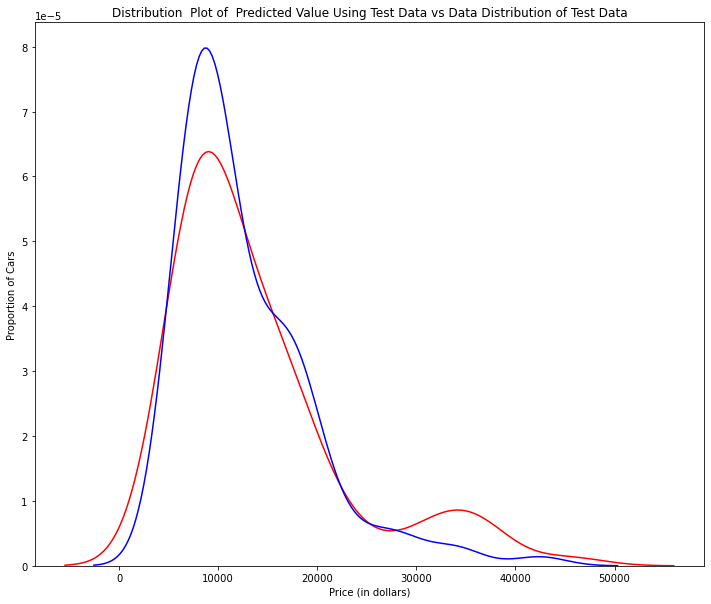

In [138]:
yhat_test1 = poly1.predict(x_test_pr1)

Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

Dist_Plot(y_test, yhat_test1, "Actual Values (Test)",
                 "Predicted Values (Test)", Title)

#### Question #4f): 
Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.

### Part 3: Ridge Regression

In [139]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(
    x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [140]:
RigeModel = Ridge(alpha=1)

In [141]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [142]:
yhat = RigeModel.predict(x_test_pr)

In [143]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


In [144]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0, 1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(
        x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:01<00:00, 624.73it/s, Test Score=0.564, Train Score=0.859]


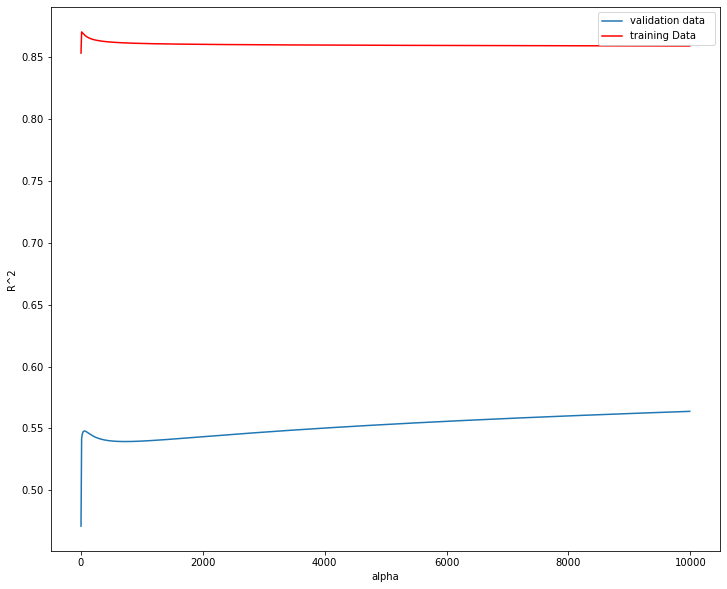

In [145]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='validation data  ')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [146]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440207341

#### Part 4: Grid Search
The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Let's import GridSearchCV from the module model_selection.

In [147]:
parameters1 = [
    {'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [148]:
# Create a Ridge regression object:
RR = Ridge()
RR

Ridge()

In [149]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [150]:
Grid1.fit(x_data[['horsepower', 'curb-weight',
          'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [151]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [152]:
BestRR.score(x_test[['horsepower', 'curb-weight',
             'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [153]:
parameters2 = [
    {'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight',
          'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(
    x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)